# CIFAR10 Tensorflow Pytorch

This notebook walks you through image classification model training in PEDL on the popular [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html), specifically using the PyTorch machine learning library.  See [this notebook](../tf-keras/CIFAR10%20Tensorflow%20Keras.ipynb) for the same example built on TensorFlow Keras.

In [ ]:
# Test importing PEDL.  In PEDL is properly installed, you should see no output.
import pedl

In [ ]:
# Replace with the IP address of the PEDL master.
pedl_master = '<master IP>'

# Run an Experiment

First, we will explore the components of a PEDL experiment; namely, the model definition and associated experiment configuration.

## Model Directory
- `__init__.py`: The entrypoint for PEDL to resolve the experiment `Trial` interface
- `data.py`: The data loading interface implementation
- `model_def.py`: The PyTorch model definition
- `.yaml` configuration files that each govern an individual experiment run

Let's look at the contents of the model directory:

In [ ]:
!ls cifar10_cnn_pytorch

<a id='data_py'></a>
### data.py
Take a look at the data loading functionality in `data.py`.  The `make_data_loaders` function is a required function that specifies the training and validation datasets to use in an experiment, while `download_data` is an optional performance efficiency API which, if implemented, causes PEDL to download and cache data once per machine rather than per process.

In [ ]:
!cat -n cifar10_cnn_pytorch/data.py

### model_def.py
Now drill in and view the model definition file.  Look for the implementation of PEDL's `PyTorchTrial` interface.  This is the interface between PEDL and PyTorch, which ultimately enables the ML Engineer to leverage PEDL's distributed hyperparameter search in a shared runtime without having to worry about these distributed system concerns.

In [ ]:
!cat -n cifar10_cnn_pytorch/model_def.py

### \_\_init\_\_.py
Given that a PEDL model definition is a Python package, `__init__.py` is the entrypoint that exposes the `Trial` implementation and data loading methods we just explored.

In [ ]:
!cat -n cifar10_cnn_pytorch/__init__.py

### const.yaml
For our first PEDL experiment, we'll run this model training job with fixed hyperparameters.  Note the following sections:
- `description`: A short description of the experiment
- `data`: A section for user to provide custom key value pairs.  Here we specify where the data resides.  Note its usage in [data.py](#data_py) on line 32.
- `hyperparameters`: area for user to define hyperparameters that will be injected into the trial class at runtime. There are constant values for this configuration
- `searcher`: hyperparameter search algorithm for the experiment

In [ ]:
!cat -n cifar10_cnn_pytorch/const.yaml

## Submit Experiment

In [ ]:
!pedl -m {pedl_master} experiment create cifar10_cnn_pytorch/const.yaml cifar10_cnn_pytorch/

Once the experiment completes (which may take a few minutes if PEDL agents have to start up), look at the experiment page to see the single completed trial.  Note the validation error around 0.75.

# Adaptive Hyperparameter Search
### adaptive.yaml

Next, let's run an experiment with the same model definition, but we'll leverage PEDL's adaptive hyperparameter search to efficiently determine the hyperparameter values that yield the lowest validation error.  Note that hyperparameters in the experiment configuration are specified as ranges as opposed to fixed values as in our [first experiment](#const.yaml).

In [ ]:
!cat -n cifar10_cnn_pytorch/adaptive.yaml

## Submit Experiment

In [ ]:
!pedl -m {pedl_master} experiment create cifar10_cnn_pytorch/adaptive.yaml cifar10_cnn_pytorch/

During and after the experiment run, you can view the best (lowest) validation error that PEDL's adaptive search finds over time:

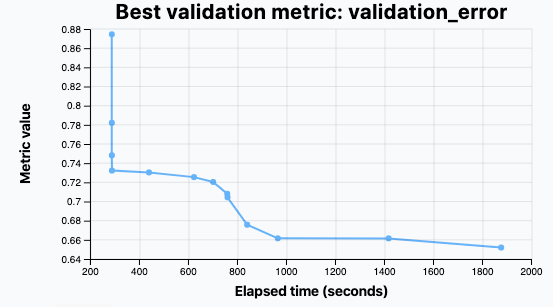

When the experiment finishes, note that your best performing model achieves a lower validation error than our first experiment that ran with constant hyperparameter values.  From the PEDL experiment detail page, you can drill in to a particular trial and view the hyperparameter values used.  You can also access the saved checkpoint of your best-performing model and load it for real-time or batch inference as described in the PyTorch documentation [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-a-general-checkpoint-for-inference-and-or-resuming-training).